In [1]:
# Importacao de pacotes
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from ising2d import *

np.seterr(divide = 'ignore', invalid = 'ignore'); # ignora warnings sobre divisao por zero (no calculo da probabilidade de flipar os spins para T = 0)

In [4]:
# Inicializacao das variaveis da simulacao
L = 10 # tamanho do array de spins
J = 1 # constante de interacao entre os spins
h = 0 # constante de interacao do spin com o campo magnetico externo

T = 3

Nsteps = 100
m = np.zeros(Nsteps)
e = np.zeros(Nsteps)

steps = [choice([-1, +1], (L, L))]
for k in range(Nsteps):
    steps.append(ising_step(steps[-1].copy(), T, J, h))
    m[k] = magnetization_per_site(steps[k])
    e[k] = energy_per_site(steps[k], J, h)

display_ising_sequence(steps);

interactive(children=(IntSlider(value=50, description='step'), Output()), _dom_classes=('widget-interact',))

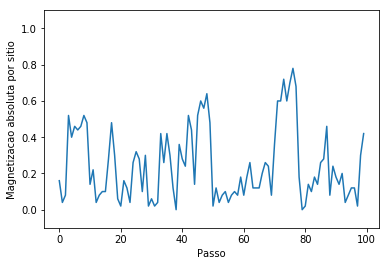

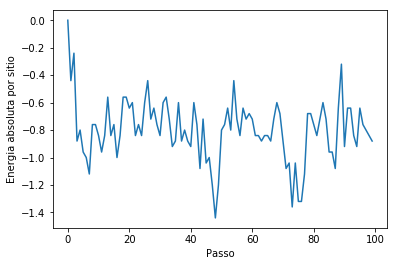

In [7]:
plt.figure()
plt.plot(np.abs(m))
plt.xlabel('Passo')
plt.ylabel('Magnetizacao absoluta por sitio')
plt.ylim(-0.1, 1.1)

plt.figure()
plt.plot(e)
plt.xlabel('Passo')
plt.ylabel('Energia absoluta por sitio')

plt.show()

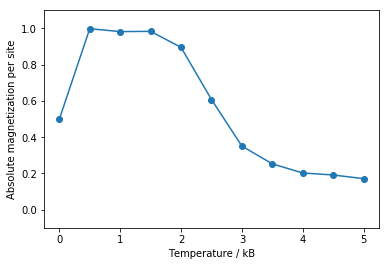

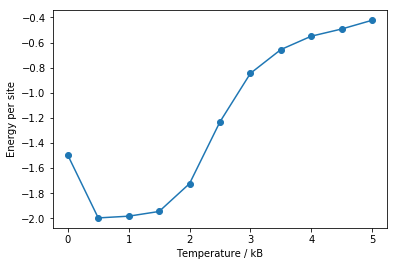

In [48]:
# Inicializacao das variaveis da simulacao
L = 8 # tamanho do array de spins
J = 1 # constante de interacao entre os spins
h = 0 # constante de interacao do spin com o campo magnetico externo

Tmin = 1e-17 # temperatura proxima de zero
Tmax = 5
DeltaT = 0.5
T = np.arange(Tmin, Tmax + DeltaT, DeltaT)
NT = len(T)

Nsteps = 1000

m = np.zeros(NT)
e = np.zeros(NT)

for k in range(NT):
    thism = np.zeros(Nsteps)
    thise = np.zeros(Nsteps)

    images = [choice([-1, +1], (L, L))]
    for n in range(Nsteps):
        images.append(ising_step(images[-1].copy(), T[k], J, h))
        thism[n] = magnetization_per_site(images[n])
        thise[n] = energy_per_site(images[n])
    
    m[k] = np.mean(np.abs(thism))
    e[k] = np.mean(thise)

plt.figure()
plt.plot(T, m, '-o')
plt.xlabel('Temperature / kB')
plt.ylabel('Magnetizacao abs')
plt.ylim(-0.1, 1.1)

plt.figure()
plt.plot(T, e, '-o')
plt.xlabel('Temperature / kB')
plt.ylabel('Energy per site')
plt.show()